## Generating a Brain Region Map

In [24]:
import abagen
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
expression, coords = abagen.get_samples_in_mask(mask=None)

c:\Users\umber\OneDrive\Documents\Research\minds\ahba\Lib\site-packages\abagen\probes_.py:147: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return io.read_microarray(microarray).groupby(sid, axis=1).mean()
c:\Users\umber\OneDrive\Documents\Research\minds\ahba\Lib\site-packages\abagen\probes_.py:147: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return io.read_microarray(microarray).groupby(sid, axis=1).mean()
c:\Users\umber\OneDrive\Documents\Research\minds\ahba\Lib\site-packages\abagen\probes_.py:147: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return io.read_microarray(microarray).groupby(sid, axis=1).mean()
c:\Users\umber\OneDrive\Documents\Research\minds\ahba\Lib\site-packages\abagen\probes_.py:147: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` withou

In [4]:
expression

gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
well_id,,,,,,,,,,,,,,,,,,,,,
594,0.301206,0.633459,0.524247,0.418119,0.354588,0.264215,0.747265,0.896750,0.267889,0.854105,...,0.664240,0.425123,0.393411,0.539312,0.441774,0.344128,0.790665,0.750759,0.548501,0.335783
2985,0.789466,0.423733,0.371010,0.236624,0.935364,0.710047,0.437137,0.661248,0.459832,0.432018,...,0.091802,0.756656,0.240631,0.915214,0.304052,0.508392,0.569169,0.770941,0.568334,0.889131
2801,0.950836,0.356655,0.597191,0.041786,0.607998,0.954603,0.204959,0.408170,0.408236,0.250875,...,0.620293,0.678288,1.000000,0.136651,0.060707,0.880952,0.438016,0.549799,0.148812,0.406152
2273,0.255668,0.211723,0.781888,0.370243,0.620974,0.137888,0.034473,0.068002,0.885394,0.148016,...,0.240219,0.131628,0.321255,0.005255,0.007859,0.908355,0.051453,0.286382,0.527082,0.017642
2785,0.282351,0.284394,0.859964,0.132408,0.454795,0.880341,0.479368,0.065681,0.682845,0.422405,...,0.402900,0.326117,0.457908,0.446117,0.031938,0.630605,0.132883,0.134859,0.263702,0.678706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159439039,0.850792,0.378878,0.595801,0.925642,0.210548,0.858887,0.239078,0.713788,0.920553,0.541071,...,0.085105,0.935246,0.563675,0.736405,0.388664,0.447696,0.232133,0.300047,0.547204,0.838614
159438991,0.634737,0.011386,0.956441,1.000000,1.000000,0.664351,0.365788,0.161670,0.899774,0.319224,...,0.423026,0.016783,0.084266,0.700463,0.878950,0.480929,0.048979,0.342996,0.698855,0.910304
159438975,0.888546,0.061438,0.946679,0.227138,0.915732,0.908007,0.842345,0.185598,0.993214,0.266372,...,0.173606,0.172717,0.085276,0.193787,0.788015,0.898143,0.000242,0.231036,0.867496,0.776488


In [5]:
coords

,x,y,z
well_id,,,
594,6.281693,-26.769456,46.030920
2985,29.463218,17.371072,-6.841868
2801,30.916352,-19.971094,12.528056
2273,-24.471659,-23.995584,-2.006094
2785,33.052748,-30.720132,-12.020580
...,...,...,...
159439039,-22.782225,-6.139403,-17.047163
159438991,-2.064244,-60.443949,-32.234913
159438975,-1.473180,-57.650541,-30.316163


In [8]:
data = pd.merge(coords, expression, on="well_id")

In [9]:
data

,x,y,z,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
well_id,,,,,,,,,,,,,,,,,,,,,
594,6.281693,-26.769456,46.030920,0.301206,0.633459,0.524247,0.418119,0.354588,0.264215,0.747265,...,0.664240,0.425123,0.393411,0.539312,0.441774,0.344128,0.790665,0.750759,0.548501,0.335783
2985,29.463218,17.371072,-6.841868,0.789466,0.423733,0.371010,0.236624,0.935364,0.710047,0.437137,...,0.091802,0.756656,0.240631,0.915214,0.304052,0.508392,0.569169,0.770941,0.568334,0.889131
2801,30.916352,-19.971094,12.528056,0.950836,0.356655,0.597191,0.041786,0.607998,0.954603,0.204959,...,0.620293,0.678288,1.000000,0.136651,0.060707,0.880952,0.438016,0.549799,0.148812,0.406152
2273,-24.471659,-23.995584,-2.006094,0.255668,0.211723,0.781888,0.370243,0.620974,0.137888,0.034473,...,0.240219,0.131628,0.321255,0.005255,0.007859,0.908355,0.051453,0.286382,0.527082,0.017642
2785,33.052748,-30.720132,-12.020580,0.282351,0.284394,0.859964,0.132408,0.454795,0.880341,0.479368,...,0.402900,0.326117,0.457908,0.446117,0.031938,0.630605,0.132883,0.134859,0.263702,0.678706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159439039,-22.782225,-6.139403,-17.047163,0.850792,0.378878,0.595801,0.925642,0.210548,0.858887,0.239078,...,0.085105,0.935246,0.563675,0.736405,0.388664,0.447696,0.232133,0.300047,0.547204,0.838614
159438991,-2.064244,-60.443949,-32.234913,0.634737,0.011386,0.956441,1.000000,1.000000,0.664351,0.365788,...,0.423026,0.016783,0.084266,0.700463,0.878950,0.480929,0.048979,0.342996,0.698855,0.910304
159438975,-1.473180,-57.650541,-30.316163,0.888546,0.061438,0.946679,0.227138,0.915732,0.908007,0.842345,...,0.173606,0.172717,0.085276,0.193787,0.788015,0.898143,0.000242,0.231036,0.867496,0.776488


### PCA

In [15]:
scaler = StandardScaler()
expression_std = scaler.fit_transform(expression)

In [16]:
pca = PCA()
pca.fit(expression_std)
# Determines how much variance among genes is explained by each brain region
pca.explained_variance_ratio_

array([2.12762823e-01, 1.20404976e-01, 7.61866812e-02, ...,
       3.80209993e-06, 3.73788362e-06, 4.31256607e-34])

Text(0, 0.5, 'Explained Variance (Cumulative)')

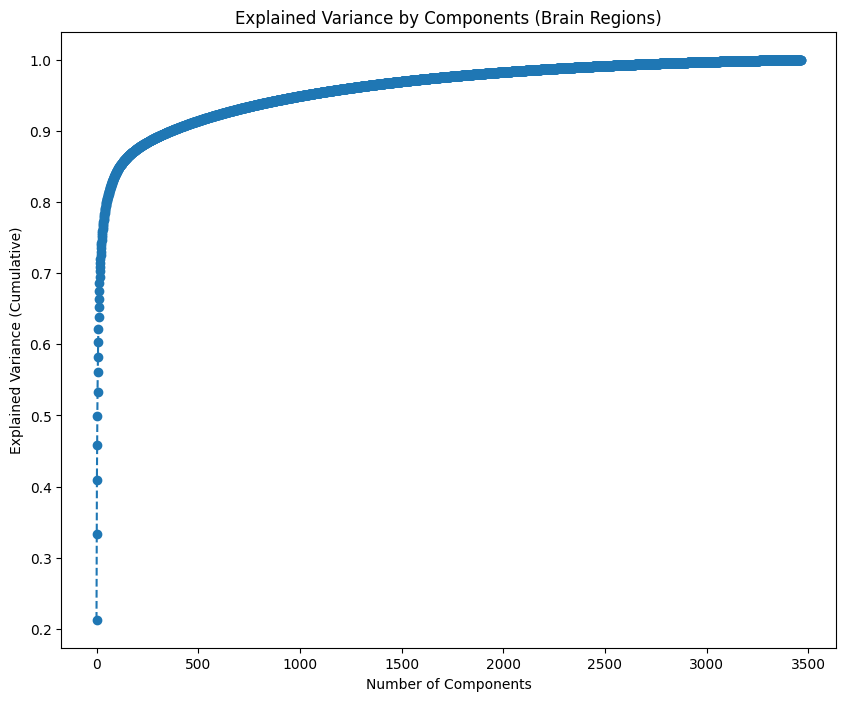

In [20]:
plt.figure(figsize=(10,8))
plt.plot(range(0, 3466), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components (Brain Regions)')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (Cumulative)')

In [23]:
# 60% of variance is encapsulated by 9 components
pca = PCA(n_components = 9)
pca.fit(expression_std)
scores_pca = pca.transform(expression_std)

In [22]:
scores_pca

array([[-61.85915975, -14.74425648, -21.21325108,  -4.40344198,
          9.23513213,   3.19754831],
       [  2.60831268, -15.91422389,   9.90909207,   7.66699007,
        -27.73012576,  -1.62889368],
       [ 31.31196236,   2.38429331, -16.26551701,   8.22056005,
        -10.40453575,   0.85657021],
       ...,
       [142.94597885,  25.32679046, -27.2797644 ,  -0.19016975,
         27.31389326, -34.38190403],
       [129.05014229,   3.66348114, -43.14173543,  -4.16696563,
        -41.60018188, -14.28028613],
       [126.02725399,   3.18625208, -22.46500406,  -8.13821547,
        -37.39101373, -40.81523192]])

### Clustering

In [25]:
wcss = []

N_CLUSTERS = 20
for i in range(1, N_CLUSTERS + 1):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 21)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

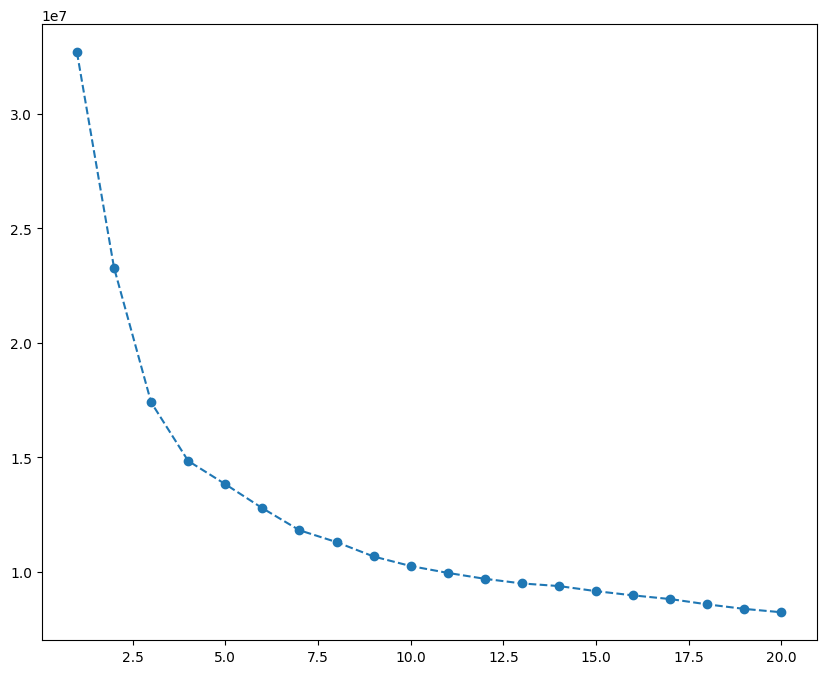

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, N_CLUSTERS + 1), wcss, marker = 'o', linestyle = '--')

In [35]:
# Given the graph above, we'd like to keep ten clusters (see Elbow Method for K-means Clustering)
N_CLUSTERS = 10
kmeans_pca = KMeans(n_clusters = N_CLUSTERS, init='k-means++', random_state = 21)
clusters = kmeans_pca.fit_predict(scores_pca)

In [36]:
expression['Cluster'] = clusters

In [37]:
expression

gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,Cluster
well_id,,,,,,,,,,,,,,,,,,,,,
594,0.301206,0.633459,0.524247,0.418119,0.354588,0.264215,0.747265,0.896750,0.267889,0.854105,...,0.425123,0.393411,0.539312,0.441774,0.344128,0.790665,0.750759,0.548501,0.335783,7
2985,0.789466,0.423733,0.371010,0.236624,0.935364,0.710047,0.437137,0.661248,0.459832,0.432018,...,0.756656,0.240631,0.915214,0.304052,0.508392,0.569169,0.770941,0.568334,0.889131,0
2801,0.950836,0.356655,0.597191,0.041786,0.607998,0.954603,0.204959,0.408170,0.408236,0.250875,...,0.678288,1.000000,0.136651,0.060707,0.880952,0.438016,0.549799,0.148812,0.406152,1
2273,0.255668,0.211723,0.781888,0.370243,0.620974,0.137888,0.034473,0.068002,0.885394,0.148016,...,0.131628,0.321255,0.005255,0.007859,0.908355,0.051453,0.286382,0.527082,0.017642,5
2785,0.282351,0.284394,0.859964,0.132408,0.454795,0.880341,0.479368,0.065681,0.682845,0.422405,...,0.326117,0.457908,0.446117,0.031938,0.630605,0.132883,0.134859,0.263702,0.678706,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159439039,0.850792,0.378878,0.595801,0.925642,0.210548,0.858887,0.239078,0.713788,0.920553,0.541071,...,0.935246,0.563675,0.736405,0.388664,0.447696,0.232133,0.300047,0.547204,0.838614,6
159438991,0.634737,0.011386,0.956441,1.000000,1.000000,0.664351,0.365788,0.161670,0.899774,0.319224,...,0.016783,0.084266,0.700463,0.878950,0.480929,0.048979,0.342996,0.698855,0.910304,5
159438975,0.888546,0.061438,0.946679,0.227138,0.915732,0.908007,0.842345,0.185598,0.993214,0.266372,...,0.172717,0.085276,0.193787,0.788015,0.898143,0.000242,0.231036,0.867496,0.776488,5


### Visualization

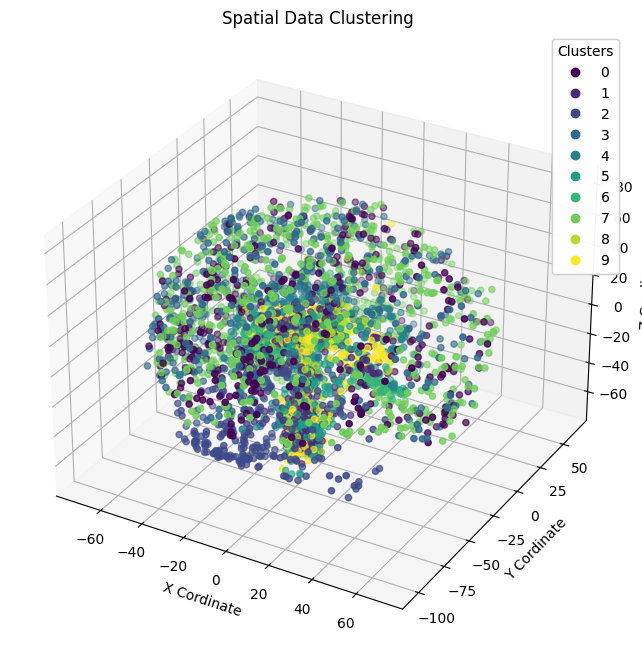

In [38]:
# Generate coordinate space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Create visualization data
vis_data = pd.merge(coords, expression[['Cluster']], left_index=True, right_index=True)

# Need add a 'c' parameter for cmap to take affect
scatter = ax.scatter(vis_data['x'], vis_data['y'], vis_data['z'], c=vis_data['Cluster'], cmap='viridis', marker='o')

# Set legend and labels
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.set_xlabel('X Cordinate')
ax.set_ylabel('Y Cordinate')
ax.set_zlabel('Z Cordinate')
ax.set_title('Spatial Data Clustering')

plt.show()